<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# K-Nearest Neighbors

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

*   Use K Nearest neighbors to classify data


**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.


### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# KNN from scikit learn for classification
from sklearn.neighbors import KNeighborsClassifier
# import model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import StandardScaler class to normalize the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>


Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


## Data Collection


In [2]:
# download the data through wget
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2024-02-19 08:13:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: 'teleCust1000t.csv'

teleCust1000t.csv   100%[===================>]  35.20K   192KB/s    in 0.2s    

2024-02-19 08:13:22 (192 KB/s) - 'teleCust1000t.csv' saved [36047/36047]



## Data Exploration


In [3]:
df = pd.read_csv('teleCust1000t.csv')
# gain insight of the dataset
display(df.info())
display(df.head())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


None

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


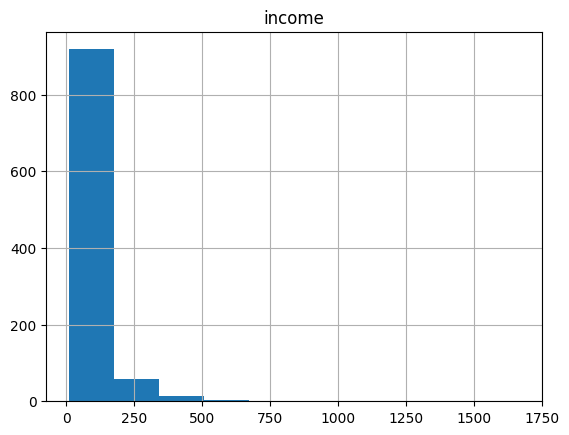

In [4]:
# visualize important features
viz = df[['income']]
viz.hist()
plt.show()

## Data Preprocessing


### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.


In [5]:
# choose feature and target columns
X = df.drop('custcat', axis=1)
y = df['custcat']

# split the data into training and testing (evaluation) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Data Modeling


<h3>K nearest neighbor (KNN)</h3>


In [6]:
# initialize the model
k = 4
knn = KNeighborsClassifier(n_neighbors = k)
# train the model
knn.fit(X_train, y_train)
# make predictions
predictions = knn.predict(X_test)

### Model evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [7]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[29 12 14  5]
 [11  5 13 10]
 [20 11 17  7]
 [18  7  9 12]]
              precision    recall  f1-score   support

           1       0.37      0.48      0.42        60
           2       0.14      0.13      0.14        39
           3       0.32      0.31      0.31        55
           4       0.35      0.26      0.30        46

    accuracy                           0.32       200
   macro avg       0.30      0.30      0.29       200
weighted avg       0.31      0.32      0.31       200



## Practice

Can you build the model again, but this time with k=6?


In [8]:
# initialize the model
k = 6
knn = KNeighborsClassifier(n_neighbors = k)
# train the model
knn.fit(X_train, y_train)
# make predictions
predictions = knn.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[30 11 16  3]
 [15  8  9  7]
 [20  8 19  8]
 [22  5 11  8]]
              precision    recall  f1-score   support

           1       0.34      0.50      0.41        60
           2       0.25      0.21      0.23        39
           3       0.35      0.35      0.35        55
           4       0.31      0.17      0.22        46

    accuracy                           0.33       200
   macro avg       0.31      0.31      0.30       200
weighted avg       0.32      0.33      0.31       200



#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


In [9]:
# set the number of iterations for trying different k values in k-NN
num_neighbors_to_try = 10

# initialize arrays to hold the mean accuracy and the standard deviation of accuracy for each k value
accuracy_per_k = np.zeros((num_neighbors_to_try - 1))
std_accuracy_per_k = np.zeros((num_neighbors_to_try - 1))

# loop over various values of k to find the k that gives the best accuracy
for k in range(1, num_neighbors_to_try):
    
    # create and train the k-NN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the labels for the test set
    predicted_labels = knn.predict(X_test)
    
    # calculate the accuracy of the predictions and store it
    accuracy_per_k[k - 1] = accuracy_score(y_test, predicted_labels)
    
    # calculate the standard deviation of the accuracy and store it
    std_accuracy_per_k[k - 1] = np.std(predicted_labels == y_test) / np.sqrt(predicted_labels.shape[0])

# output the mean accuracy for each k value
print("accuracy per k value:", accuracy_per_k)

accuracy per k value: [0.3   0.33  0.35  0.315 0.335 0.325 0.335 0.33  0.32 ]


#### Plot the model accuracy for a different number of neighbors.


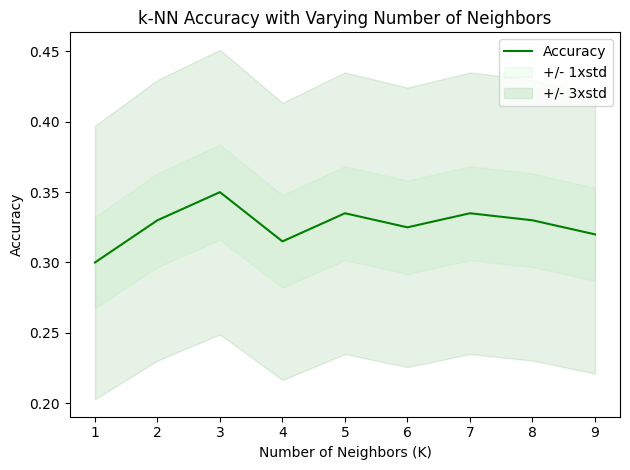

In [10]:
# define the range of k values
k_range = range(1, num_neighbors_to_try)
# plot the mean accuracy in green
plt.plot(k_range, accuracy_per_k, 'g')
# fill the area between the mean accuracy +/- 1 standard deviation
plt.fill_between(k_range, accuracy_per_k - std_accuracy_per_k, accuracy_per_k + std_accuracy_per_k, 
                 alpha=0.10, color='lightgreen')
# fill the area between the mean accuracy +/- 3 standard deviations
plt.fill_between(k_range, accuracy_per_k - 3 * std_accuracy_per_k, accuracy_per_k + 3 * std_accuracy_per_k, 
                 alpha=0.10, color='green')
# add a legend, labels, and a title for context
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.title('k-NN Accuracy with Varying Number of Neighbors')
plt.tight_layout()
plt.show()

In [11]:
print( "The best accuracy was with", accuracy_per_k.max(), "with k=", accuracy_per_k.argmax()+1) 

The best accuracy was with 0.35 with k= 3


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>
